In [1]:
%pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


from utils import (
    CLEAN_COMPLETE_DATA_FILE_PATH,
    FEATURES_DATA_FILE_PATH)

TRAIN_START_DATE updated to: 2020-06-01, TRAIN_END_DATE updated to: 2024-07-05


In [3]:
data = pd.read_parquet(CLEAN_COMPLETE_DATA_FILE_PATH)
data['date'] = pd.to_datetime(data['date'])

print(f'Running exploratory data analysis on {data.shape[0]} rows and {len(data.columns)} columns')
data.head()


Running exploratory data analysis on 1654463 rows and 77 columns


,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,cpi_India,cpi_Italy,cpi_Brazil,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year
0,2020-06-01,0xBTC,0.142721,0.152836,0.133416,0.145287,1227624,0xBitcoin,0xBitcoin,2.099998e+07,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
1,2020-06-01,BTT,0.000300,0.000312,0.000298,0.000311,67136753,BitTorrent [New],BitTorrent coin,9.900000e+14,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
2,2020-06-01,ASD,0.037355,0.038924,0.037070,0.038295,2117671,ASD,ASD,7.806153e+08,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
3,2020-06-01,NWC,0.021969,0.022889,0.021884,0.022715,238352,Numerico,Numerico,2.700505e+08,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020
4,2020-06-01,DAD,0.242849,0.408407,0.242230,0.272164,10332685,DAD,DAD,1.000000e+09,...,128.5304,102.7,124.0019,105.027448,122.5766,107.8078,96.96129,106.97271,106.01,2020


In [4]:
# Summary statistics
summary_stats = data.describe(include='all')
summary_stats

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,cpi_India,cpi_Italy,cpi_Brazil,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year
count,1654463,1654463,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1654463,1654463,1.654463e+06,...,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06,1.654463e+06
unique,NaN,1413,NaN,NaN,NaN,NaN,NaN,1411,1405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FLUX,NaN,NaN,NaN,NaN,NaN,Ellipsis,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1534,NaN,NaN,NaN,NaN,NaN,2098,5650,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022-09-22 12:40:21.003552512,NaN,2.269016e+02,2.613225e+02,2.088517e+02,2.174556e+02,7.869906e+07,NaN,NaN,5.897012e+13,...,1.443504e+02,1.138999e+02,1.480377e+02,1.140514e+02,1.413048e+02,1.116561e+02,1.006202e+02,1.193731e+02,1.156816e+02,2.022232e+03
min,2020-06-01 00:00:00,NaN,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e+00,NaN,NaN,0.000000e+00,...,1.285304e+02,1.023000e+02,1.240019e+02,1.050274e+02,1.225766e+02,1.075590e+02,9.653792e+01,1.068126e+02,1.052700e+02,2.020000e+03
25%,2021-10-29 00:00:00,NaN,8.215000e-03,8.740500e-03,7.790000e-03,8.199000e-03,8.709450e+04,NaN,NaN,1.000000e+08,...,1.377200e+02,1.062000e+02,1.409634e+02,1.094971e+02,1.333462e+02,1.089486e+02,9.911849e+01,1.131381e+02,1.090900e+02,2.021000e+03
50%,2022-10-10 00:00:00,NaN,8.518100e-02,8.999700e-02,8.059700e-02,8.502200e-02,5.888240e+05,NaN,NaN,7.152800e+08,...,1.459832e+02,1.187000e+02,1.497836e+02,1.151264e+02,1.437426e+02,1.122566e+02,1.007104e+02,1.207446e+02,1.167000e+02,2.022000e+03
75%,2023-09-11 00:00:00,NaN,7.874750e-01,8.296510e-01,7.473250e-01,7.860635e-01,4.482976e+06,NaN,NaN,2.630547e+09,...,1.530345e+02,1.201000e+02,1.558365e+02,1.188477e+02,1.490042e+02,1.139262e+02,1.019929e+02,1.261093e+02,1.214000e+02,2.023000e+03
max,2024-08-12 00:00:00,NaN,1.573471e+07,1.716332e+07,1.486707e+05,1.709341e+05,6.131225e+11,NaN,NaN,5.000000e+16,...,1.541362e+02,1.206000e+02,1.610515e+02,1.195118e+02,1.535505e+02,1.151810e+02,1.046838e+02,1.261894e+02,1.237800e+02,2.024000e+03


# Active - open source indicator

In [5]:
data['is_open_source_and_active'] = data['is_open_source'] * data['is_active']

# Size Factor

In [6]:
# Log-transform of market capitalization to reduce skewness and compress range
data['log_market_cap'] = np.log(data['market_cap'] + 1)  # +1 to avoid log(0)

data['size_factor'] = (data['log_market_cap'] * 1000).round().astype(int)

sorted_data = data.sort_values(by='size_factor', ascending=False)

# Print the sorted DataFrame
sorted_data.head(1000)

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,cpi_South Korea,cpi_Mexico,cpi_Saudi Arabia,cpi_Australia,cpi_Canada,cpi_France,year,is_open_source_and_active,log_market_cap,size_factor
347395,2021-08-27,BTC,46894.554688,49112.785156,46394.281250,49058.667969,34511076995,Bitcoin,Bitcoin,19737153.0,...,108.759227,130.7416,108.5649,97.74144,112.257290,108.16,2021,1,27.757491,27757
980730,2023-02-12,BTC,21870.902344,22060.994141,21682.828125,21788.203125,17821046406,Bitcoin,Bitcoin,19737153.0,...,116.549580,146.4715,112.7648,99.10764,122.426103,119.76,2023,1,27.757491,27757
1271218,2023-10-05,BTC,27798.646484,28091.861328,27375.601562,27415.912109,11877253670,Bitcoin,Bitcoin,19737153.0,...,118.847681,149.9580,114.1336,100.12020,126.189364,121.32,2023,1,27.757491,27757
132585,2021-01-01,BTC,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,Bitcoin,Bitcoin,19737153.0,...,107.083089,126.5273,107.7145,101.48160,108.974445,106.07,2021,1,27.757491,27757
1161997,2023-07-09,BTC,30291.611328,30427.589844,30085.591797,30171.234375,7903327692,Bitcoin,Bitcoin,19737153.0,...,118.415470,147.7904,113.7707,99.12198,126.029225,122.10,2023,1,27.757491,27757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257209,2021-05-28,BTC,38507.082031,38856.968750,34779.039062,35697.605469,55200191952,Bitcoin,Bitcoin,19737153.0,...,107.578551,128.9357,108.1086,100.88100,111.056249,107.57,2021,1,27.757491,27757
1519809,2024-04-24,BTC,66408.718750,67075.367188,63589.871094,64276.898438,30276655120,Bitcoin,Bitcoin,19737153.0,...,118.847681,152.9721,115.1810,103.82650,126.189364,123.59,2024,1,27.757491,27757
1023272,2023-03-19,BTC,26969.503906,28440.560547,26907.716797,28038.675781,37769448859,Bitcoin,Bitcoin,19737153.0,...,116.802582,146.4419,113.2003,99.11849,123.627144,120.55,2023,1,27.757491,27757
1183187,2023-07-26,BTC,29225.759766,29675.552734,29113.912109,29354.972656,13497554655,Bitcoin,Bitcoin,19737153.0,...,118.415470,147.7904,113.7707,99.12198,126.029225,122.10,2023,1,27.757491,27757


# Liquidity factor

In [7]:
# Log-transform of trade volume
data['log_volume'] = np.log(data['volume'] + 1)  # +1 to avoid taking log of zero

# Scale the log values to a more readable range and convert to integer
# Adjust the scaling factor based on the desired granularity and range
data['scaled_log_volume'] = (data['log_volume'] * 1000).round().astype(int)

# Assigning scaled_log_volume as the liquidity factor
data['liquidity_factor'] = data['scaled_log_volume']

sorted_data = data.sort_values(by='liquidity_factor', ascending=False)

# Print the sorted DataFrame
sorted_data.head(1000)

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,cpi_Australia,cpi_Canada,cpi_France,year,is_open_source_and_active,log_market_cap,size_factor,log_volume,scaled_log_volume,liquidity_factor
635794,2022-05-06,ZIL,0.078861,0.085011,0.072085,0.081526,613122511429,Zilliqa,Zilliqa,1.939395e+10,...,100.4237,119.543604,114.60,2022,1,19.323661,19324,27.141831,27142,27142
176924,2021-02-26,BTC,47180.464844,48370.785156,44454.843750,46339.761719,350967941479,Bitcoin,Bitcoin,1.973715e+07,...,102.0973,108.974445,106.80,2021,1,27.757491,27757,26.583961,26584,26584
177139,2021-02-26,LINK,24.734232,26.948971,23.761681,25.187313,170549323809,Chainlink,Chainlink,1.000000e+09,...,102.0973,108.974445,106.80,2021,1,22.531246,22531,25.862290,25862,25862
248517,2021-05-19,BTC,42944.976562,43546.117188,30681.496094,37002.441406,126358098747,Bitcoin,Bitcoin,1.973715e+07,...,100.8810,111.056249,107.57,2021,1,27.757491,27757,25.562386,25562,25562
140322,2021-01-11,BTC,38346.531250,38346.531250,30549.599609,35566.656250,123320567399,Bitcoin,Bitcoin,1.973715e+07,...,101.4816,108.974445,106.07,2021,1,27.757491,27757,25.538053,25538,25538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623539,2024-07-18,BTC,64104.738281,65104.660156,63246.164062,63974.066406,27239305337,Bitcoin,Bitcoin,1.973715e+07,...,104.6838,126.189364,123.78,2024,1,27.757491,27757,24.027927,24028,24028
868889,2022-11-13,BTC,16799.722656,16920.765625,16320.634766,16353.365234,27209183682,Bitcoin,Bitcoin,1.973715e+07,...,100.0482,120.744645,116.70,2022,1,27.757491,27757,24.026820,24027,24027
964060,2023-01-30,BTC,23774.648438,23789.347656,22657.582031,22840.138672,27205595568,Bitcoin,Bitcoin,1.973715e+07,...,101.9686,122.025756,118.55,2023,1,27.757491,27757,24.026689,24027,24027
1482510,2024-03-24,BTC,64070.753906,67622.757812,63825.851562,67234.171875,27206630673,Bitcoin,Bitcoin,1.973715e+07,...,102.2924,126.189364,123.41,2024,1,27.757491,27757,24.026727,24027,24027


# Extracting features from the close price

In [8]:
original_columns = data.columns.tolist()

for lag in [1, 3, 7, 14, 30]:  # you can adjust the lags as needed
    data[f'ma_{lag}'] = data['close'].rolling(window=lag).mean()
    data[f'lag_{lag}'] = data['close'].shift(lag)
    data[f'roc_{lag}'] = data['close'].pct_change(periods=lag) * 100
    data[f'momentum_{lag}'] = data['close'] - data['close'].shift(lag)
    data[f'pct_chg_{lag}'] = data.groupby('symbol')['close'].pct_change(periods=lag)
    data[f'ema_{lag}'] = data['close'].ewm(span=lag, adjust=False).mean()
    # data[f'rolling_std_{lag}'] = data['close'].rolling(window=lag).std()
    data[f'close_lag_{lag}'] = data.groupby('symbol')['close'].shift(lag)
                   
data.dropna(inplace=True)

new_columns = data.columns.tolist()
close_price_fetures = [col for col in new_columns if col not in original_columns]

print(close_price_fetures)

print(f'Data Overview after adding features: {data.shape[0]} rows and {len(data.columns)} columns.')
data.head()

['ma_1', 'lag_1', 'roc_1', 'momentum_1', 'pct_chg_1', 'ema_1', 'close_lag_1', 'ma_3', 'lag_3', 'roc_3', 'momentum_3', 'pct_chg_3', 'ema_3', 'close_lag_3', 'ma_7', 'lag_7', 'roc_7', 'momentum_7', 'pct_chg_7', 'ema_7', 'close_lag_7', 'ma_14', 'lag_14', 'roc_14', 'momentum_14', 'pct_chg_14', 'ema_14', 'close_lag_14', 'ma_30', 'lag_30', 'roc_30', 'momentum_30', 'pct_chg_30', 'ema_30', 'close_lag_30']
Data Overview after adding features: 1611129 rows and 118 columns.


,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,pct_chg_14,ema_14,close_lag_14,ma_30,lag_30,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,0.076291,2.743346,1.273851,2.708959,0.026757,5024.019978,1.344277,0.236854,23.555308,1.108485
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,-0.031173,2.377828,0.002021,2.696987,0.361138,-99.457825,-0.359180,-0.031173,22.035737,0.002021
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,-0.113126,2.060921,0.001158,2.696944,0.002298,-55.308964,-0.001271,0.105490,20.614143,0.000929
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,0.092784,1.786244,0.000776,2.696432,0.016231,-94.775430,-0.015383,0.730612,19.284253,0.000490
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,-0.057464,10.454373,72.507370,4.895450,0.015142,451232.792352,68.325671,-0.145051,21.285626,79.935539


In [9]:
# # Isolate Bitcoin's closing prices
# btc_prices = data[data['symbol'] == 'BTC'].set_index('date')['close']

# # Join Bitcoin's close prices back to the main DataFrame on the date
# data = data.join(btc_prices, on='date', rsuffix='_btc')


# # List of unique symbols
# symbols = data['symbol'].unique()

# # Empty list to collect results
# results = []

# # Loop through each symbol and calculate rolling correlations separately
# for symbol in symbols:
#     symbol_data = data[data['symbol'] == symbol].copy()  # Copy data for this symbol
#     for lag in [7, 14, 30]:  # Adjust lags as needed
#         symbol_data[f'btc_correlation_{lag}'] = symbol_data['close'].rolling(window=lag).corr(symbol_data['close_btc'])
    
#     results.append(symbol_data)  # Collect results

# # Concatenate all the results back into a single DataFrame
# data = pd.concat(results)

# # Handle NaNs or other final adjustments as needed
# # data.dropna(inplace=True)

# data.head(100)

In [10]:
print(data.columns.to_list())

['date', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'name', 'keywords', 'total_supply', 'circulating_supply', 'market_cap', 'infinite_supply', 'is_open_source', 'source_code', 'is_active', 'fear_greed_value', 'fear_greed_classification', 'week_start', 'week_end', 'google_trend_score', 'gdp_Australia', 'gdp_Brazil', 'gdp_Canada', 'gdp_China', 'gdp_France', 'gdp_Germany', 'gdp_India', 'gdp_Italy', 'gdp_Japan', 'gdp_Korea Rep', 'gdp_Mexico', 'gdp_Russian Federation', 'gdp_Saudi Arabia', 'gdp_United Kingdom', 'gdp_United States', 'inflation_rate_Australia', 'inflation_rate_Brazil', 'inflation_rate_Canada', 'inflation_rate_China', 'inflation_rate_France', 'inflation_rate_Germany', 'inflation_rate_India', 'inflation_rate_Italy', 'inflation_rate_Japan', 'inflation_rate_Korea Rep', 'inflation_rate_Mexico', 'inflation_rate_Russian Federation', 'inflation_rate_Saudi Arabia', 'inflation_rate_United Kingdom', 'inflation_rate_United States', 'interest_rate_United States', 'interest_rate_Un

# Extracting features from the date

In [11]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

data['timestamp'] = data['date'].astype(int) / 1e9  # pandas uses nanoseconds by default

data.head()

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,lag_30,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30,month,day,dayofweek,timestamp
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,0.026757,5024.019978,1.344277,0.236854,23.555308,1.108485,7,1,2,1.593562e+09
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,0.361138,-99.457825,-0.359180,-0.031173,22.035737,0.002021,7,1,2,1.593562e+09
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,0.002298,-55.308964,-0.001271,0.105490,20.614143,0.000929,7,1,2,1.593562e+09
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,0.016231,-94.775430,-0.015383,0.730612,19.284253,0.000490,7,1,2,1.593562e+09
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,0.015142,451232.792352,68.325671,-0.145051,21.285626,79.935539,7,1,2,1.593562e+09


# Adding the symbol as encoded

In [12]:
def custom_hash_encode(symbols, mod_value=10000019):
    # Apply hash, take absolute value to ensure positivity, and use modulo to limit the range
    return [abs(hash(symbol)) % mod_value for symbol in symbols]

# Apply the custom hash encode function to the 'symbol' column
data['symbol_encoded'] = custom_hash_encode(data['symbol'])

# Display the first few rows of the dataframe to see the result
data.head()

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,roc_30,momentum_30,pct_chg_30,ema_30,close_lag_30,month,day,dayofweek,timestamp,symbol_encoded
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,5024.019978,1.344277,0.236854,23.555308,1.108485,7,1,2,1.593562e+09,7113142
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,-99.457825,-0.359180,-0.031173,22.035737,0.002021,7,1,2,1.593562e+09,3345705
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,-55.308964,-0.001271,0.105490,20.614143,0.000929,7,1,2,1.593562e+09,1092425
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,-94.775430,-0.015383,0.730612,19.284253,0.000490,7,1,2,1.593562e+09,5580789
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,451232.792352,68.325671,-0.145051,21.285626,79.935539,7,1,2,1.593562e+09,7939949


# Extracting features from the fear-greed index data

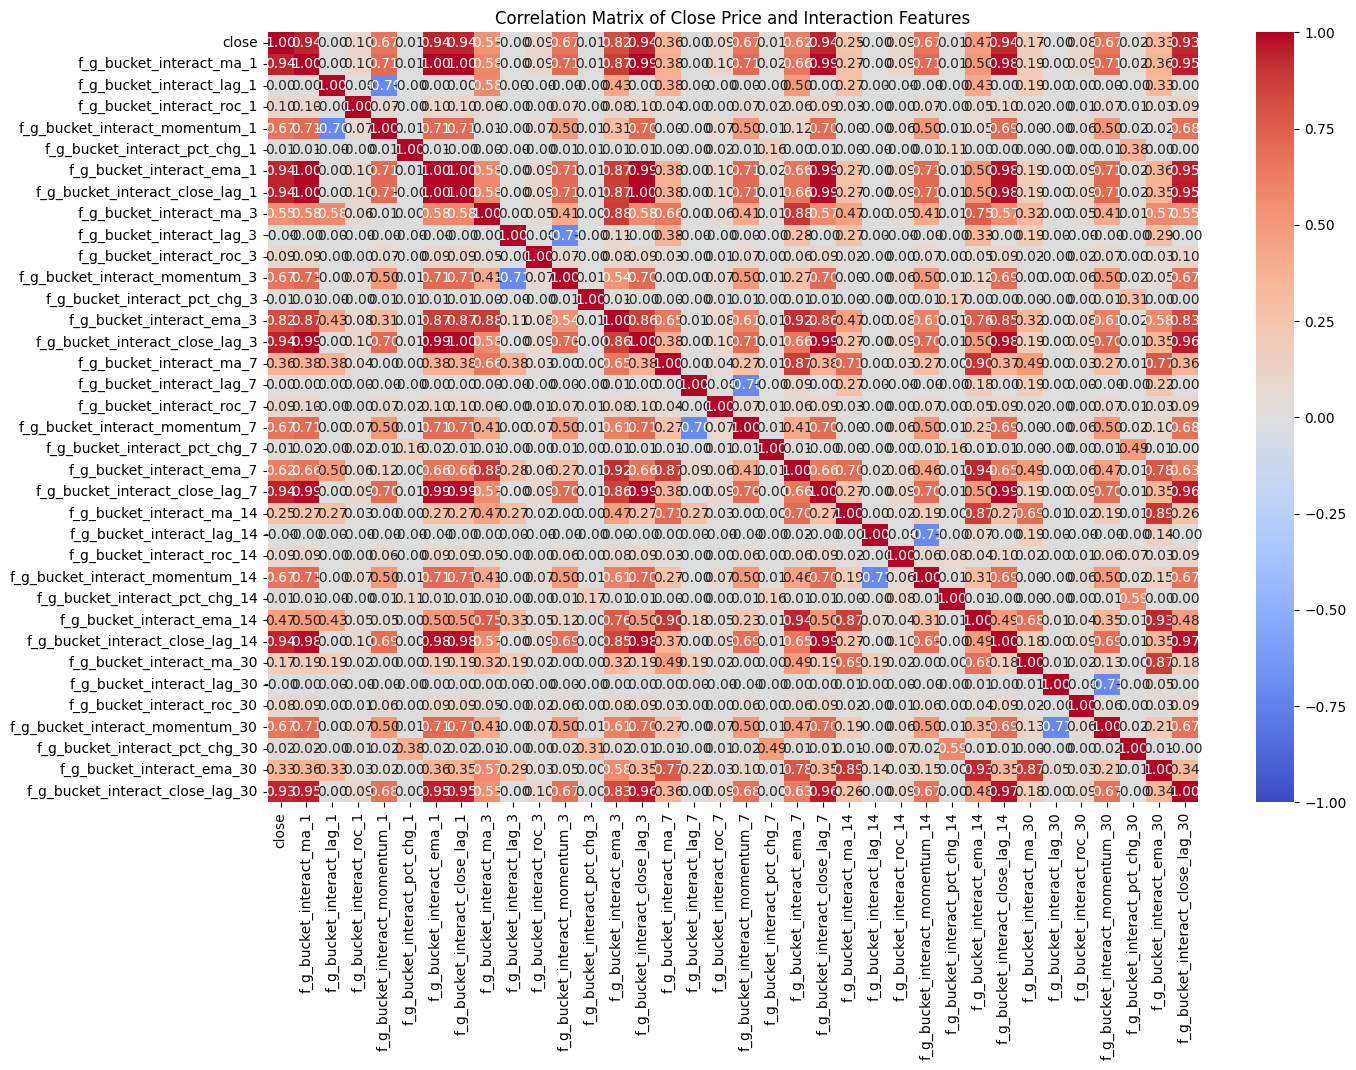

,correlation_with_close
f_g_bucket_interact_ma_1,0.940710
f_g_bucket_interact_ema_1,0.940710
f_g_bucket_interact_close_lag_7,0.938542
f_g_bucket_interact_close_lag_1,0.938438
f_g_bucket_interact_close_lag_3,0.938429
f_g_bucket_interact_close_lag_14,0.935958
f_g_bucket_interact_close_lag_30,0.931691
f_g_bucket_interact_ema_3,0.815611
f_g_bucket_interact_momentum_7,0.668169
f_g_bucket_interact_momentum_1,0.667481


In [13]:
# Bucket the fear_greed_value into categories: 0, 0.25, 0.5, 0.75, 1
bins = [0, 25, 50, 75, 100]
labels = [0.25, 0.5, 0.75, 1]
data['fear_greed_bucket'] = pd.cut(data['fear_greed_value'], bins=bins, labels=labels, include_lowest=True)

# Convert the categorical data to numerical form for interaction
data['fear_greed_bucket'] = data['fear_greed_bucket'].astype(float)

# Create interaction terms and calculate correlations using the bucketed fear_greed_value
interaction_correlations_bucketed = {}

for feature in close_price_fetures:
    interaction_term = f'f_g_bucket_interact_{feature}'
    data[interaction_term] = data['fear_greed_bucket'] * data[feature]
    interaction_correlations_bucketed[interaction_term] = data[[interaction_term, 'close']].corr().iloc[0, 1]

# Convert the dictionary to a sorted DataFrame for easy viewing
interaction_corr_bucketed_df = pd.DataFrame.from_dict(interaction_correlations_bucketed, orient='index', columns=['correlation_with_close'])
interaction_corr_bucketed_df = interaction_corr_bucketed_df.sort_values(by='correlation_with_close', ascending=False)

# Plotting the correlation matrix
correlation_matrix = data[['close'] + [f'f_g_bucket_interact_{feature}' for feature in close_price_fetures]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Close Price and Interaction Features')
plt.show()

top_3_features_fear_greed = interaction_corr_bucketed_df.head(3).index
interaction_corr_bucketed_df.head(100)

In [14]:
f_g_columns = [col for col in data.columns if col.startswith('f_g_')]
f_g_columns_to_drop = list(set(f_g_columns) - set(top_3_features_fear_greed))

data = data.drop(f_g_columns_to_drop, axis=1)
data.head()

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,close_lag_30,month,day,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_7
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,1.108485,7,1,2,1.593562e+09,7113142,0.5,0.685517,0.685517,0.693642
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,0.002021,7,1,2,1.593562e+09,3345705,0.5,0.000979,0.000979,0.001065
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,0.000929,7,1,2,1.593562e+09,1092425,0.5,0.000514,0.000514,0.000564
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,0.000490,7,1,2,1.593562e+09,5580789,0.5,0.000424,0.000424,0.000510
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,79.935539,7,1,2,1.593562e+09,7939949,0.5,34.170406,34.170406,36.259117


# GDP factors

In [15]:
gdp_weights = {
    'gdp_United States': 24,  
    'gdp_China': 16,          
    'gdp_Japan': 6,           
    'gdp_Germany': 5,         
    'gdp_India': 4,           
    'gdp_United Kingdom': 3,  
}

# Initialize the weighted aggregates
data['weighted_global_gdp'] = 0

# Calculate the weighted GDP, inflation rate, and interest rate
for gdp_col, weight in gdp_weights.items():
    # Check if the column exists to avoid KeyError
    if gdp_col in data.columns:
        data['weighted_global_gdp'] += data[gdp_col] * weight

# Normalize by the total weight sum (to create an average)
total_weight = sum(gdp_weights.values())
data['weighted_global_gdp'] /= total_weight

data.head()

,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,month,day,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_7,weighted_global_gdp
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,7,1,2,1.593562e+09,7113142,0.5,0.685517,0.685517,0.693642,1.405724e+13
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,7,1,2,1.593562e+09,3345705,0.5,0.000979,0.000979,0.001065,1.405724e+13
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,7,1,2,1.593562e+09,1092425,0.5,0.000514,0.000514,0.000564,1.405724e+13
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,7,1,2,1.593562e+09,5580789,0.5,0.000424,0.000424,0.000510,1.405724e+13
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,7,1,2,1.593562e+09,7939949,0.5,34.170406,34.170406,36.259117,1.405724e+13


# Interest rate

In [16]:
# Identify all interest rate columns
interest_rate_columns = [col for col in data.columns if col.startswith('interest_rate_')]

# Calculate moving averages for different periods (e.g., 7-day, 30-day)
# Precompute moving averages
ma_7_cols = {col: data[col].rolling(window=7).mean() for col in interest_rate_columns}
ma_30_cols = {col: data[col].rolling(window=30).mean() for col in interest_rate_columns}

# Calculate trends using vectorized operations
trend_data = pd.DataFrame(index=data.index)

for col in interest_rate_columns:
    trend_data[col] = np.where(ma_7_cols[col] > ma_30_cols[col], 1, 
                               np.where(ma_7_cols[col] < ma_30_cols[col], -1, 0))

# Calculate the overall interest rate
data['overall_interest_rate'] = data[interest_rate_columns].mean(axis=1)

# Calculate the overall trend by summing trends across all interest rates
data['interest_rate_trend'] = trend_data.sum(axis=1)

data.head()


,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,dayofweek,timestamp,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_7,weighted_global_gdp,overall_interest_rate,interest_rate_trend
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,2,1.593562e+09,7113142,0.5,0.685517,0.685517,0.693642,1.405724e+13,0.816792,0
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,2,1.593562e+09,3345705,0.5,0.000979,0.000979,0.001065,1.405724e+13,0.816792,0
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,2,1.593562e+09,1092425,0.5,0.000514,0.000514,0.000564,1.405724e+13,0.816792,0
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,2,1.593562e+09,5580789,0.5,0.000424,0.000424,0.000510,1.405724e+13,0.816792,0
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,2,1.593562e+09,7939949,0.5,34.170406,34.170406,36.259117,1.405724e+13,0.816792,0


# Inflation rate

In [17]:
# Identify all inflation rate columns
inflation_rate_columns = [col for col in data.columns if col.startswith('inflation_rate_')]

# Calculate moving averages for different periods (e.g., 7-day, 30-day)
# Precompute moving averages
ma_7_cols = {col: data[col].rolling(window=7).mean() for col in inflation_rate_columns}
ma_30_cols = {col: data[col].rolling(window=30).mean() for col in inflation_rate_columns}

# Calculate trends using vectorized operations
trend_data = pd.DataFrame(index=data.index)

for col in inflation_rate_columns:
    trend_data[col] = np.where(ma_7_cols[col] > ma_30_cols[col], 1, 
                               np.where(ma_7_cols[col] < ma_30_cols[col], -1, 0))

# Calculate the overall inflation rate
data['overall_inflation_rate'] = data[inflation_rate_columns].mean(axis=1)

# Calculate the overall trend by summing trends across all inflation rates
data['inflation_rate_trend'] = trend_data.sum(axis=1)

data.head()


,date,symbol,open,high,low,close,volume,name,keywords,total_supply,...,symbol_encoded,fear_greed_bucket,f_g_bucket_interact_ma_1,f_g_bucket_interact_ema_1,f_g_bucket_interact_close_lag_7,weighted_global_gdp,overall_interest_rate,interest_rate_trend,overall_inflation_rate,inflation_rate_trend
15212,2020-07-01,ANT,1.367611,1.421046,1.361079,1.371034,241642,Aragon,Aragon,4.319143e+07,...,7113142,0.5,0.685517,0.685517,0.693642,1.405724e+13,0.816792,0,131.517715,0
15213,2020-07-01,ATP,0.002001,0.002016,0.001923,0.001958,182839,Atlas Protocol,Atlas Protocol,4.000001e+09,...,3345705,0.5,0.000979,0.000979,0.001065,1.405724e+13,0.816792,0,131.517715,0
15214,2020-07-01,APL,0.001059,0.001086,0.001006,0.001027,1337944,Apollo Currency,Apollo Currency,2.116510e+10,...,1092425,0.5,0.000514,0.000514,0.000564,1.405724e+13,0.816792,0,131.517715,0
15215,2020-07-01,VRA,0.000821,0.000895,0.000800,0.000848,484256,Verasity,Verasity wallet,9.893051e+10,...,5580789,0.5,0.000424,0.000424,0.000510,1.405724e+13,0.816792,0,131.517715,0
15217,2020-07-01,DASH,68.211861,69.186211,67.445114,68.340813,222432902,Dash,Dash coin,1.191014e+07,...,7939949,0.5,34.170406,34.170406,36.259117,1.405724e+13,0.816792,0,131.517715,0


In [18]:
data.reset_index()
data.to_parquet(FEATURES_DATA_FILE_PATH, index=False)

sample_dataset = data.sample(n=1000, random_state=42)
sample_dataset.to_csv('../data/features_sample.csv', index=False)

: 